In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Import dataset 

sumber : https://www.kaggle.com/adityakadiwal/water-potability

In [214]:
df1 = pd.read_csv("water_potability.csv")
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [215]:
len(df1)

3276

## Hapus missing value baris


Penghapusan missing value dipilih pada baris yang memiliki missing value. penghapusan tidak dilakukan perkolom karena feature ph dan sulfat penting untuk menentukan kelayakan air minum]

In [216]:
df1.isna().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [217]:
df = df1.dropna() #menghapus unit yang memiliki missing value

In [218]:
len(df) #sample yang tersisa

2011

## Pengacakan 

pengacakan dilakukan sebelum melakukan cross-validation agar pemisahan train dan test set juga acak

In [219]:
df.sample(frac=1, replace=True, random_state=2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1943,8.185923,240.979104,23641.472028,6.611449,318.689010,410.158222,13.109911,56.913981,3.566945,1
856,7.918183,224.152005,20012.172976,9.008726,302.393605,421.890083,22.187849,72.727868,4.764194,0
803,7.804369,216.673869,14160.686766,6.060144,281.355975,468.212537,15.147547,62.860627,4.075557,1
2621,5.859690,163.496895,19231.033290,6.541681,339.371480,468.376955,19.749079,61.790980,2.747333,0
2535,8.543217,183.907860,33037.353387,2.726766,358.556471,631.498623,17.333153,68.183227,2.847875,0
...,...,...,...,...,...,...,...,...,...,...
907,5.296579,220.080832,39537.086460,9.232766,322.433592,393.388603,10.583336,58.801469,3.918470,0
2488,6.862936,220.147889,23580.657290,6.611543,285.192181,325.721747,13.472758,89.412935,3.806093,0
1839,6.187938,249.527111,12682.150941,6.253224,263.268416,274.764703,14.352955,57.623368,3.546183,0
2270,6.020654,197.469090,10529.310299,5.305352,416.495213,412.011733,9.909315,59.167002,5.217131,0


## Pemisahan Explanatory variable dan target variable

In [220]:
Y = (df["Potability"])
X = df.drop("Potability",axis = "columns")

## Pembuatan fungsi Cross-validation

In [221]:
def cross_val(X,Y,K_vals): #pandas 
    
    
    """
    df adalah dataset berukuran (m,n)
    m = jumlah training examples
    n = jumlah feature dan target
    kolom pertama adalah respon
    kolom lain merupakan feature 
    """
    Train_err = {}
    Test_err = {}
    errtr={}
    errts={}
    general = {}
    n = len(X)
    j = 0
    for K in K_vals:
        loss_train = []
        loss_test  = []
        
        for k in range(1,K+1):
            # integer indicade os test samples
            test_ind = ((n/K)*(k-1)+np.arange(1,n/K + 1)-1).astype("int")
            train_ind = np.setdiff1d(np.arange(n),test_ind)
                                                           
            X_train, Y_train = X[train_ind, :], Y[train_ind]
            X_test, Y_test = X[test_ind,:], Y[test_ind]
            """
            pada baris model sampai test_err dapat disesuaikan 
            algoritma pembelajarannya, baik dari library atau
            buatan sendiri
            """
            
            model = LogisticRegression(random_state=0,max_iter = 10000).fit(X_train,Y_train)
            train_err =  model.score(X_train, Y_train)
            test_err = model.score(X_test, Y_test)
            
            loss_train.append(1- train_err)
            loss_test.append(1- test_err)
            
            
        errtr[str(K)+" Fold"]=loss_train
        errts[str(K)+" Fold"]=loss_test
        
        Train_err["Fold "+str(K)] = sum(loss_train)/K
        Test_err["Fold "+str(K)]  = sum(loss_test)/K
        general["Fold "+str(K)]   = np.abs(sum(loss_test)/K - sum(loss_train)/K)
        
    return Train_err, Test_err, errtr, errts, general
        
            
            
            
    
    

## Training dan testing model

In [222]:
Train_err, Test_err, errtr, errts, general = cross_val(
                                    np.array(X),np.array(Y),
                                    [10,20,30,40,50,
                                    60,70,80,90,100])

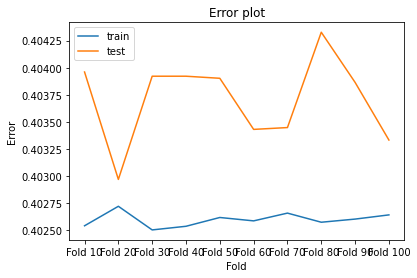

In [223]:
fold = Train_err.keys()
train = Train_err.values()
test = Test_err.values()
#gen = np.array(train)-np.array(test)

plt.plot(fold,train,label = "train")
plt.plot(fold,test, label = "test")


plt.xlabel("Fold")
plt.ylabel("Error")
plt.title("Error plot")
plt.legend()

plt.show()

Error masih 40%, model masih underfit

Dari grafik di atas, FOLD CV yang paling baik pada train err adalah pada fold 20

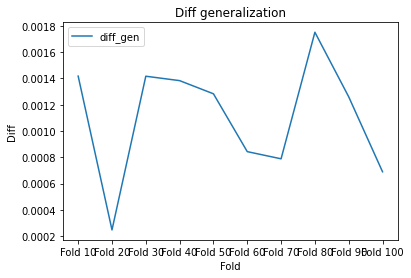

In [224]:
plt.plot(fold,general.values(),label = "diff_gen")

plt.xlabel("Fold")
plt.ylabel("Diff")
plt.title("Diff generalization")
plt.legend()

plt.show()

Dari grafik di atas, FOLD CV yang paling tidak overfit adalah pada fold 20. overfit atau tidak dinilai dari selisih train dan test error.

## Percobaan dengan drop kolom "ph" dan "sulfate"

In [225]:
df2 = df1.dropna(thresh = len(df1)*0.9, axis="columns")
df2.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0


In [226]:
df2 = df2.dropna()

In [227]:
X1 = df2.drop("Potability", axis = "columns")
Y1 = df2["Potability"]

In [228]:
Train_err, Test_err, errtr, errts, general = cross_val(np.array(X1),
                                                       np.array(Y1),
                                                       [10,20,30,40,50,
                                    60,70,80,90,100])

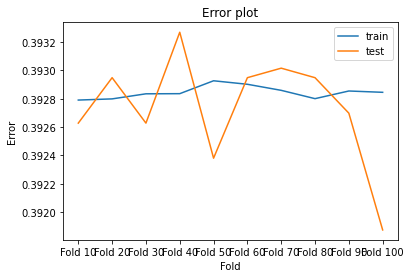

In [229]:
fold = Train_err.keys()
train = Train_err.values()
test = Test_err.values()
#gen = np.array(train)-np.array(test)

plt.plot(fold,train,label = "train")
plt.plot(fold,test, label = "test")


plt.xlabel("Fold")
plt.ylabel("Error")
plt.title("Error plot")
plt.legend()

plt.show()

error masih sekitar 40%, model masih underfit

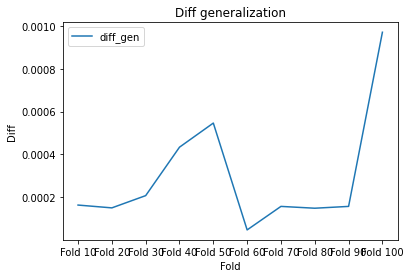

In [230]:
plt.plot(fold,general.values(),label = "diff_gen")

plt.xlabel("Fold")
plt.ylabel("Diff")
plt.title("Diff generalization")
plt.legend()

plt.show()

In [231]:
errtr["10 Fold"]

[0.41042112776588147,
 0.4079229122055674,
 0.3822269807280514,
 0.3818700927908637,
 0.3829407566024269,
 0.4093504639543183,
 0.4082798001427552,
 0.3807994289793005,
 0.3818700927908637,
 0.3822269807280514]